# **MOVIE RECOMMENDER**

## **Types of Movie Recommendation System**
> **1. Content-Based Movie Recommendation Systems**

> **2. Collaborative Filtering Movie Recommendation Systems**

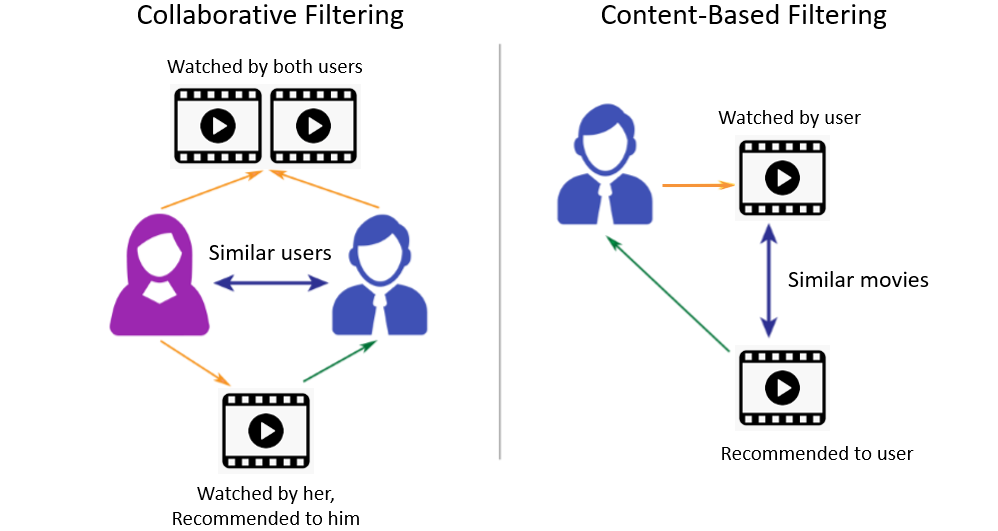

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Importing the Dataset**

In [2]:
data = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv', low_memory = False)

### **Exploratory Data Analysis**

#### **Dataset Preview**

In [3]:
data.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


#### **Dimensions of the Dataset**

In [4]:
data.shape 

(45466, 24)

#### **Summary of the Dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### **Checking for missing values**

In [6]:
data.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### **Descriptive Statistics**

#### **Numeric Columns**

In [7]:
data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


#### **Character Columns**

In [8]:
data.describe(include=['object'])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,45461,45080,45463,45463,45379,45460,45379,20412,45460,45460
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,43758,45024,22708,2393,17336,1931,6,20283,42277,2
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,0.0,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False
freq,45454,29,36573,5000,12,3,3,32269,8,133,66,5,11875,17851,136,22395,45014,7,11,45367


<hr>

### **Building the Content Based Recommender**

In [9]:
# Calculating the average vote rate
vote_rate = data['vote_average'].mean()
print(vote_rate)

5.618207215134185


*We can observe that the average votes rating of a movie on IMDB is around 5.6 on a scale of 10.*

In [10]:
# Calculating the minimum number of votes to be in the chart
min_votes = data['vote_count'].quantile(0.90)
print(min_votes)

160.0


In [11]:
# Filtering out all qualified movies into a new DataFrame
new_moviesdf = data.copy().loc[data['vote_count'] >= min_votes]
new_moviesdf.shape

(4555, 24)

*It is clear that there are around 10% movies with vote count more than 160 and is qualified to be on this list.*

In [12]:
# Computing the score(rating) of each movie
def score(x, min_votes = min_votes, vote_rate = vote_rate):
    vote_cnt = x['vote_count']
    vote_avg = x['vote_average']
    # Calculation based on the IMDB formula
    return (vote_cnt/(vote_cnt+min_votes) * vote_avg) + (min_votes/(min_votes+vote_cnt) * vote_rate)

In [13]:
# Defining a new feature 'score' and calculate its value
new_moviesdf['score'] = new_moviesdf.apply(score, axis=1)

In [14]:
# Sorting the movies based on score calculated above
new_moviesdf = new_moviesdf.sort_values('score', ascending=False)
# Print the top 5 movies
new_moviesdf[['title', 'vote_count', 'vote_average', 'score']].head(5)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385


### **Content - Based Recommender**

#### **Credits, Genres, and Keywords-Based Recommender**

In [15]:
# Load keywords and credits
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')

In [16]:
# Remove rows with bad IDs.
data = data.drop([19730, 29503, 35587]) # Causes value error

# Convert IDs to int (Merging Purpose)
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
data['id'] = data['id'].astype('int')

# Merge keywords and credits into main 'data' dataframe
data = data.merge(credits, on='id')
data = data.merge(keywords, on='id')

In [17]:
# Newly merged Dataframe
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [18]:
# Parsing the string features into their corresponding python objects
from ast import literal_eval # helps in traversing an abstract syntax tree

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

In [19]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    # Return empty list in case of missing/malformed data
    return []

In [21]:
# Define new director, cast, genres and keywords features that are in a suitable form.
data['director'] = data['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
data[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


In [23]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    data[feature] = data[feature].apply(clean_data)

In [25]:
def merge(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [26]:
data['merge'] = data.apply(merge, axis=1)

In [27]:
data[['merge']].head(5)

,merge
0,jealousy toy boy tomhanks timallen donrickles ...
1,boardgame disappearance basedonchildren'sbook ...
2,fishing bestfriend duringcreditsstinger walter...
3,basedonnovel interracialrelationship singlemot...
4,baby midlifecrisis confidence stevemartin dian...


In [28]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['merge'])

In [29]:
count_matrix.shape

(46628, 73881)

In [30]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [31]:
# Reset index of your main DataFrame and construct reverse mapping as before
data = data.reset_index()
indices = pd.Series(data.index, index = data['title'])

In [32]:
# Function that takes in movie title as input and outputs most similar movies

def recommend_movies(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [33]:
recommend_movies('The Godfather')

1934            The Godfather: Part III
1199             The Godfather: Part II
15609                   The Rain People
18940                         Last Exit
34488                              Rege
35802            Manuscripts Don't Burn
35803            Manuscripts Don't Burn
8001     The Night of the Following Day
18261                 The Son of No One
28683            In the Name of the Law
Name: title, dtype: object

In [34]:
recommend_movies('The Son of No One')

18940                             Last Exit
34488                                  Rege
22539                                 Apnea
39832                          Dustbin Baby
46323                           Getting Out
11471    A Guide To Recognizing Your Saints
1430                          Donnie Brasco
1934                The Godfather: Part III
3271                      Dog Day Afternoon
13491                             Game Over
Name: title, dtype: object

In [35]:
recommend_movies('The Shawshank Redemption')

4523            Johnny Handsome
6216                     Levity
28530     Women in Cell Block 7
1616                    Witness
6116                  Dark Blue
12209            Gone Baby Gone
6839            Le Cercle Rouge
18940                 Last Exit
34488                      Rege
35802    Manuscripts Don't Burn
Name: title, dtype: object